## Imports

In [1]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mick/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer # For sentiment analysis
import pickle # For loaded dataset from pickle file
import tqdm # Progress bar
from collections import Counter # Handy addon
from pprint import pprint # Useful to print JSON objects
import numpy as np

/Users/mick/anaconda/envs/ee227-py3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
# This loads the file that you want, might take several seconds (up to a minute)

with open("news_sentiment.pickle", "rb") as f:
    articles = pickle.load(f, encoding='bytes')
print(len(articles), "articles were loaded")
print("Example article:")
pprint(articles[1040])


57767 articles were loaded
Example article:
{b'news_topic': b'ISIS War',
 'introductions': [{'person': 'Bashar al-Assad',
                    'text': 'President',
                    'wdid': 'Q44329'},
                   {'person': 'Emile Hokayem', 'text': 'in Foreign Policy'},
                   {'person': 'Ahrar al Sham',
                    'text': 'the most important groups',
                    'wdid': 'Q860943'},
                   {'person': 'Vladimir Putin',
                    'text': 'Russian President',
                    'wdid': 'Q7747'},
                   {'person': 'Barack Obama',
                    'text': 'U.S. President',
                    'wdid': 'Q76'},
                   {'person': 'Osama Abu Zeid',
                    'text': 'a senior adviser to the moderate Free Syrian '
                            'Army'},
                   {'person': 'Op-Ed',
                    'text': 'for The Washington Post',
                    'wdid': 'Q2602337'},
                  

In [4]:
# separate articles from the two stories
ISIS_articles = []
Brexit_articles = []
for a in articles:
    if a[b"news_topic"] == b'ISIS War':
        ISIS_articles.append(a)
    else:
        Brexit_articles.append(a)
        
print(len(ISIS_articles), " articles from ISIS War and ", len(Brexit_articles), "articles from Brexit were loaded")

39206  articles from ISIS War and  18561 articles from Brexit were loaded


In [5]:
# get only articles from one story, you can change this
articles = ISIS_articles

## Extract introductions, and obtain their sentiment

In [6]:
analyzer = SentimentIntensityAnalyzer()

total_introductions = []
for a in articles:
    for intro in a.get('introductions', []):
        intro['source'] = a['source']
        total_introductions.append(intro)

for intro in tqdm.tqdm_notebook(total_introductions):
    intro['sentiment'] = analyzer.polarity_scores(intro['text'])['compound']

Widget Javascript not detected.  It may not be installed or enabled properly.


In [7]:
# Example some sentiment for some of the introductions

subsample = np.random.choice(total_introductions, 100)
for intro in subsample:
    if intro['sentiment'] != 0:
        print("---------------")
        print("Entity mentionned:", intro['person'])
        print(intro['text'])
        print("Sentiment:", intro['sentiment'])

---------------
Entity mentionned: @RT_com-- Lizzie Phelan
medical help
Sentiment: 0.4019
---------------
Entity mentionned: CONSEQUENCES
REAL AND ROBUST
Sentiment: 0.34
---------------
Entity mentionned: Nathan Griffiths
who helps oversee about $ 1.1 billion as a senior money manager at NN Investment Partners in The Hague
Sentiment: 0.3818
---------------
Entity mentionned: Abu Omar
reached by AFP in Beirut via Skype
Sentiment: 0.1027
---------------
Entity mentionned: Gary Volesky
who heads the land component command of the US - led coalition to defeat
Sentiment: -0.4588
---------------
Entity mentionned: Erdogan
whose AK Party took office in 2002 with a reformist agenda
Sentiment: 0.4019
---------------
Entity mentionned: Russian Arms Support
Assad Touts Military Gain
Sentiment: 0.5106
---------------
Entity mentionned: Selahattin Demirtas
the party 's
Sentiment: 0.4019
---------------
Entity mentionned: Nouri al-Maliki
a Shiite who stepped down in August amid calls for his resignat

## Build a 2-dimensional object containing sentiment per entity, per source

In [8]:
ent_source_sent = {}

for intro in total_introductions:
    p = intro['person']
    s = intro['source']
    if p not in ent_source_sent:
        ent_source_sent[p] = {}
    if s not in ent_source_sent[p]:
        ent_source_sent[p][s] = []
    ent_source_sent[p][s].append(intro['sentiment'])

In [9]:
# An example of how one entity (a city) is described by different sources

print(ent_source_sent['Aleppo'])

{'bbc.co.uk': [0.0516, 0.0, -0.1531, 0.0, 0.0, 0.0, -0.1531, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1531, -0.3182, -0.5994, -0.5994, 0.0, 0.0, 0.0, -0.1531, 0.0, 0.0, 0.0, -0.1531, 0.0, 0.0, 0.0], 'cnn.com': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.5994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0516, 0.0, 0.0, 0.0, -0.5994, -0.3818, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.7096, -0.7096, 0.0, 0.0, 0.0, -0.3612, 0.0, 0.0, 0.0, 0.0, 0.0, -0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1779], 'theguardian.com': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.7096, 0.0, -0.1531, 0.0], 'middleeasteye.net': [-0.1531, 0.0, 0.0, 0.0, 0.0, -0.1531, -0.4404, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1531, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3612, 0.0, 0.0, -0.1531, 0.0, 0.0, -0.1531, 0.0, 0.0, -0.1531, -0.1531, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [10]:
# We get rid of entities that don't contain enough data

entities_kept = []

for entity in ent_source_sent.keys():
    sentiments = ent_source_sent[entity]
    total_size = sum([len(sentiments[source]) for source in sentiments.keys()])
    if total_size >= 3:
        entities_kept.append(entity)
        
print("We will keep a total of", len(entities_kept), " / ", len(ent_source_sent.keys()) ,"in our dataset")

sources = set([])
for entity in entities_kept:
    sources|= set(ent_source_sent[entity].keys())
sources = list(sources)

print("We have ", len(sources), "sources: ", sources)

We will keep a total of 7852  /  25128 in our dataset
We have  22 sources:  ['independent.co.uk', 'aa.com.tr', 'telegraph.co.uk', 'wikinews.org', 'nytimes.com', 'washingtonpost.com', 'theguardian.com', 'businessinsider.in', 'middleeasteye.net', 'bloomberg.com', 'aljazeera.com', 'techcrunch.com', 'latimes.com', 'bbc.co.uk', 'chinadaily.com.cn', 'reuters.com', 'foxnews.com', 'allafrica.com', 'france24.com', 'rt.com', 'cnn.com', 'ap.org']


## We create the array we will use in our sparse model

In [11]:
# Parameters: changing these affects the results you get
Pos_neg_ratio = 2.0
overall_ratio = 0.15
pos_threshold = 0.15
neg_threshold = -0.15

N = len(entities_kept)
M = len(sources)
A = np.zeros((N, M))

sentiment_counts = Counter()

source2j = {source: j for j, source in enumerate(sources)}

for i, entity in enumerate(entities_kept):
    for source in ent_source_sent[entity].keys():
        sent_array = np.array(ent_source_sent[entity][source])
        N_pos = float(len(np.where(sent_array > pos_threshold)[0]))
        N_neg = float(len(np.where(sent_array < neg_threshold)[0]))
        T = float(len(sent_array))
        aggregate_sentiment = 0
        if N_pos > Pos_neg_ratio*N_neg and N_pos > overall_ratio*T:
            aggregate_sentiment = 1
        elif N_neg > Pos_neg_ratio*N_pos and N_neg > overall_ratio*T:
            aggregate_sentiment = -1
        j = source2j[source]
        
        A[i,j] = aggregate_sentiment
        
        sentiment_counts[aggregate_sentiment] += 1

print ("We allocated some sentiment in this matrix, the repartition is:", sentiment_counts)

We allocated some sentiment in this matrix, the repartition is: Counter({0: 19062, 1: 3650, -1: 2669})


## Model source similarity

In [12]:
# Write code that uses this matrix (entities, sources) to compute
# source similarity visible in bias of the way they describe entities

In [13]:
from sklearn.preprocessing import StandardScaler
A_std = StandardScaler().fit_transform(A)

In [14]:
from sklearn.covariance import GraphLasso
graph_lasso = GraphLasso(alpha=0.12)
graph_lasso.fit(A_std)
np.mean(graph_lasso.get_precision() > 0)

for (i, j) in zip(*np.where(abs(graph_lasso.get_precision()) > 0)):
    if i > j:
        print(sources[i], sources[j])

washingtonpost.com telegraph.co.uk
washingtonpost.com nytimes.com
theguardian.com independent.co.uk
middleeasteye.net theguardian.com
bloomberg.com telegraph.co.uk
bloomberg.com nytimes.com
bloomberg.com washingtonpost.com
aljazeera.com independent.co.uk
aljazeera.com aa.com.tr
aljazeera.com theguardian.com
aljazeera.com middleeasteye.net
latimes.com wikinews.org
bbc.co.uk theguardian.com
bbc.co.uk middleeasteye.net
bbc.co.uk aljazeera.com
chinadaily.com.cn wikinews.org
reuters.com telegraph.co.uk
reuters.com nytimes.com
reuters.com washingtonpost.com
reuters.com bloomberg.com
foxnews.com independent.co.uk
foxnews.com telegraph.co.uk
foxnews.com washingtonpost.com
foxnews.com bloomberg.com
foxnews.com reuters.com
france24.com telegraph.co.uk
france24.com middleeasteye.net
france24.com aljazeera.com
france24.com reuters.com
france24.com foxnews.com
rt.com chinadaily.com.cn
cnn.com telegraph.co.uk
cnn.com washingtonpost.com
cnn.com bloomberg.com
cnn.com reuters.com
cnn.com foxnews.com
cn

## Workspace

In [15]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [16]:
from Visualizer import plot_network 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

0.1


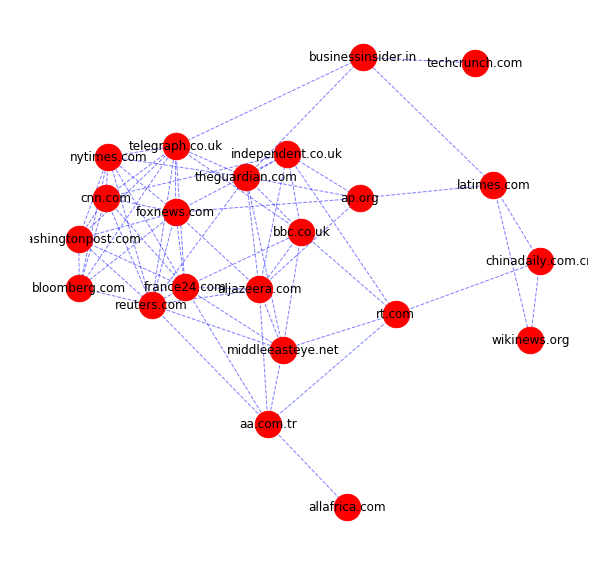

0.105


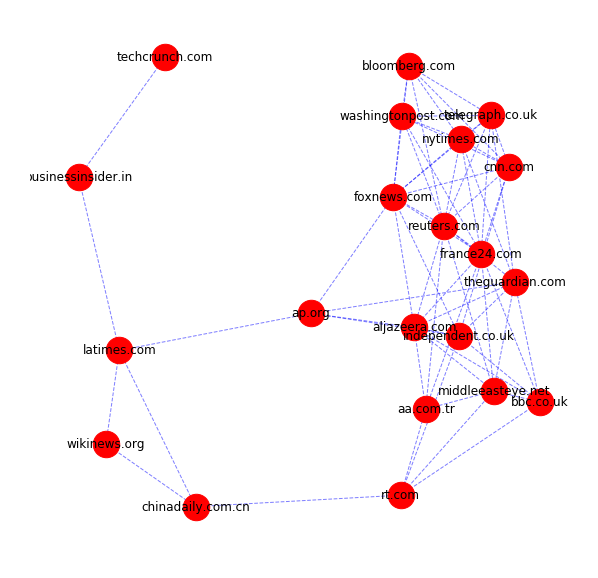

0.11


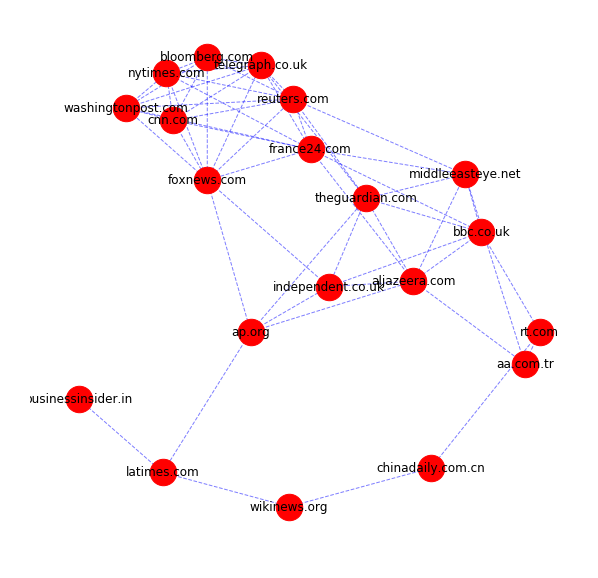

0.115


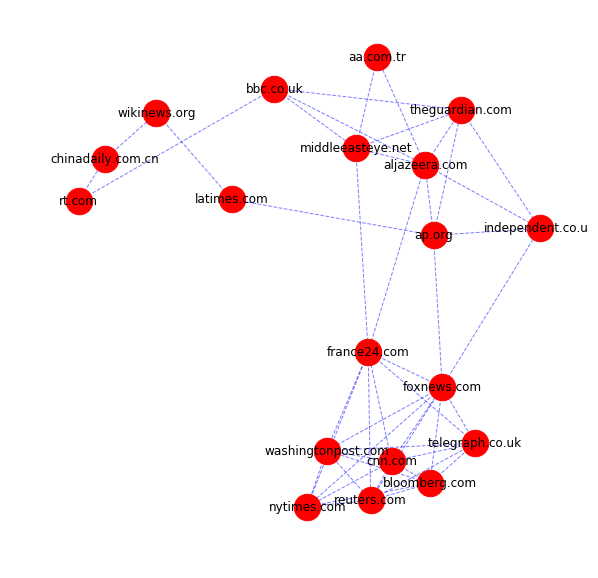

0.12


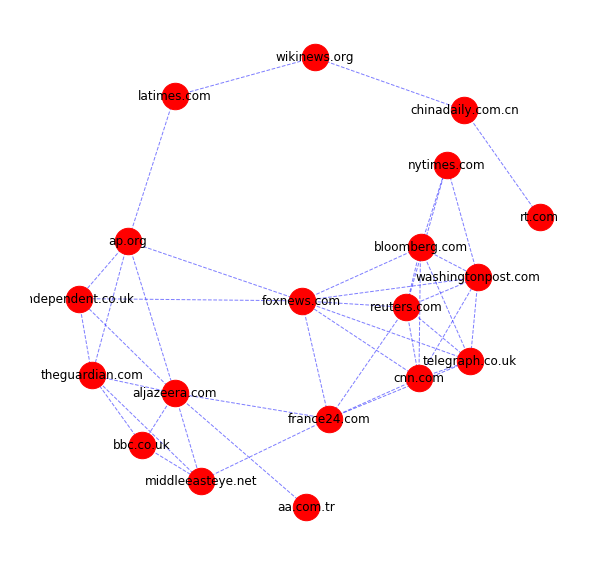

0.125


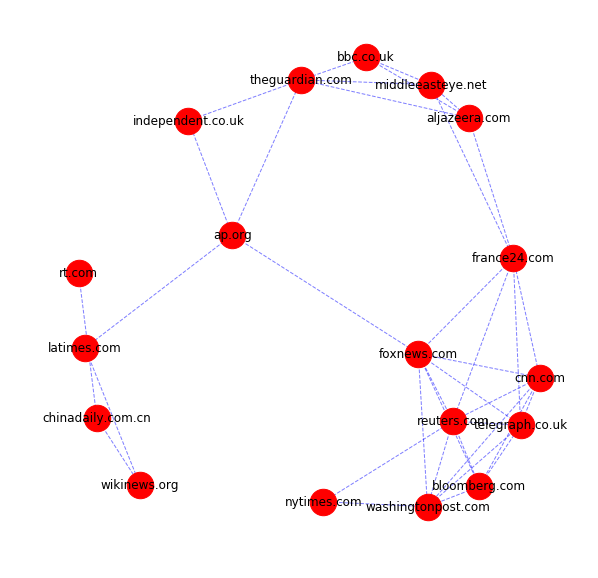

0.13


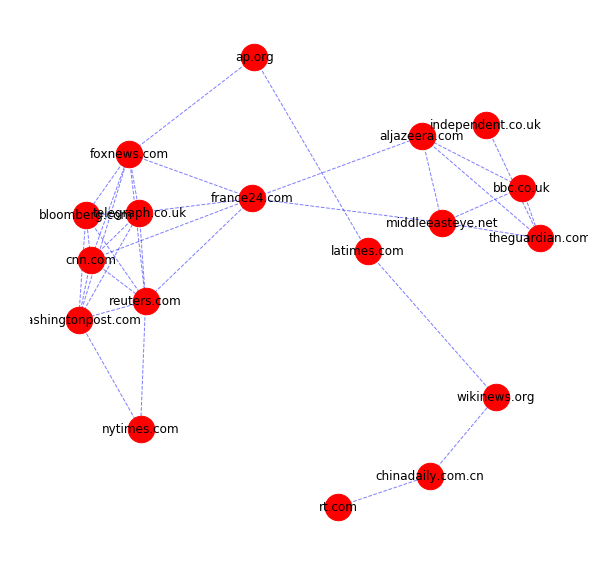

0.135


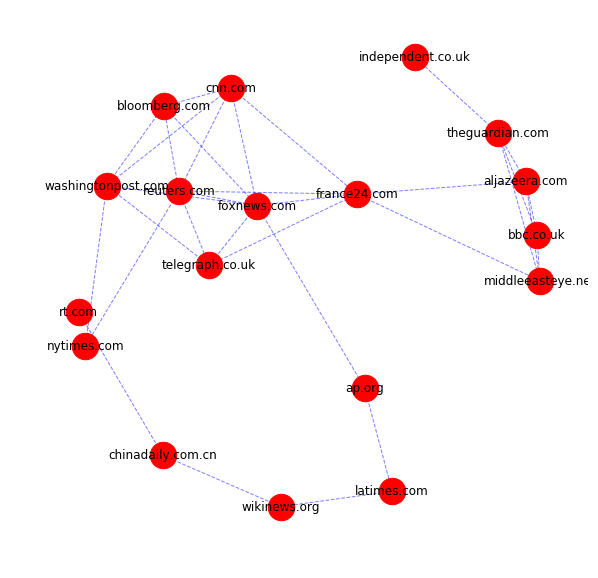

0.14


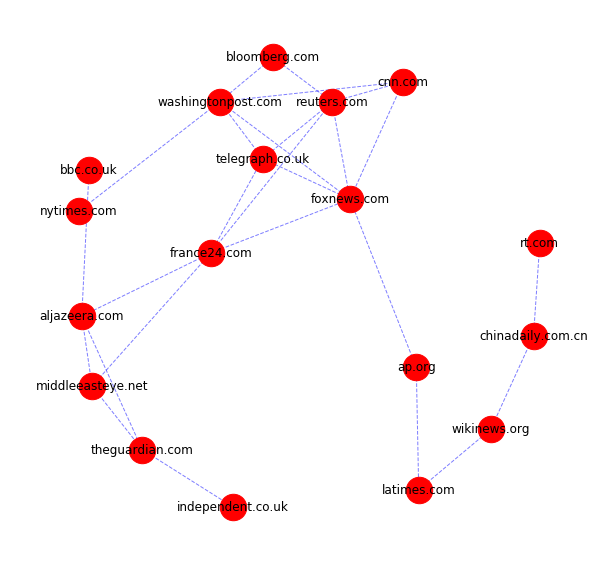

0.145


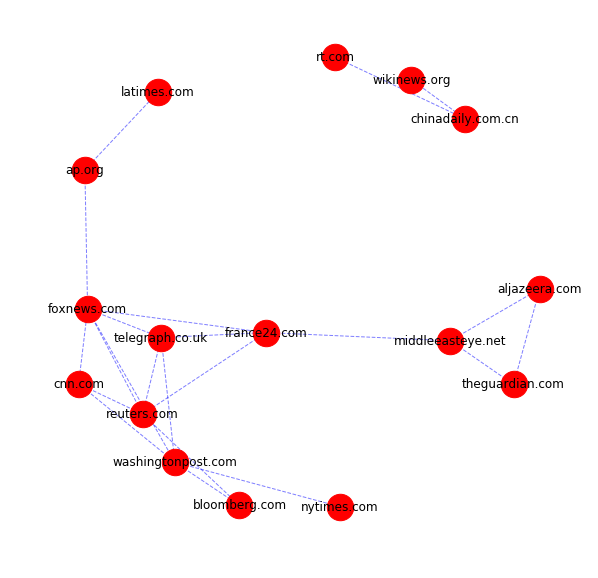

0.15


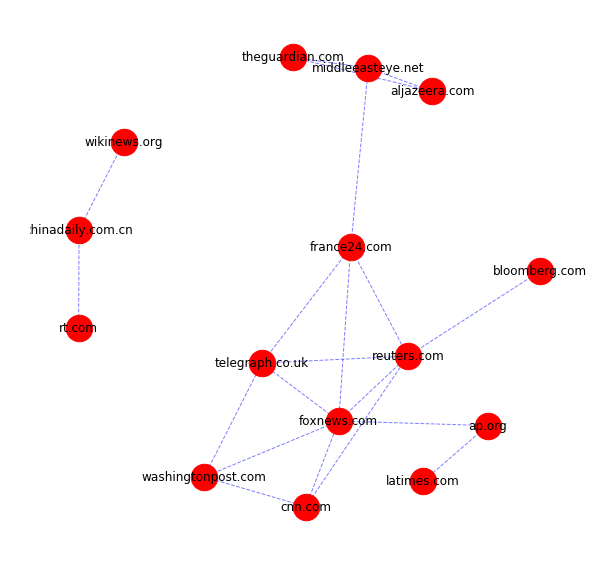

0.155


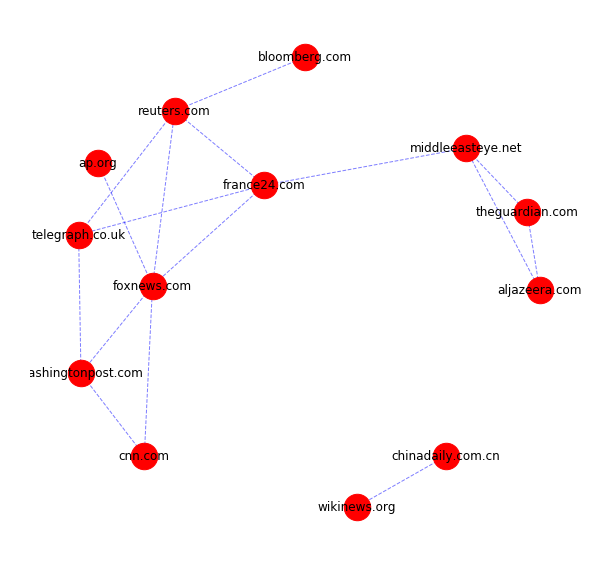

0.16


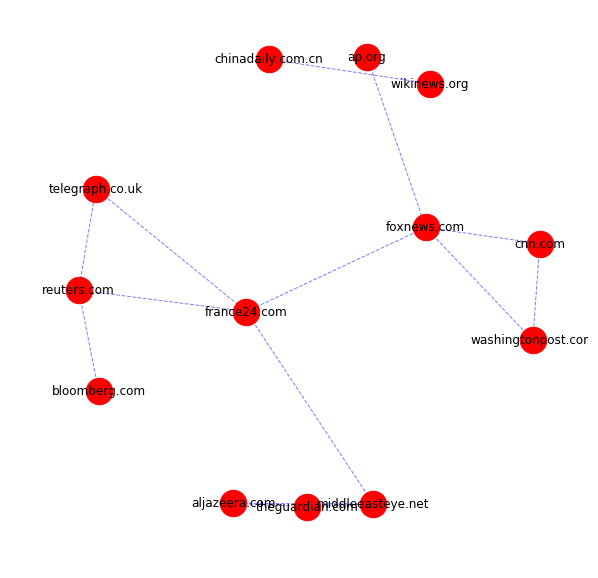

0.165


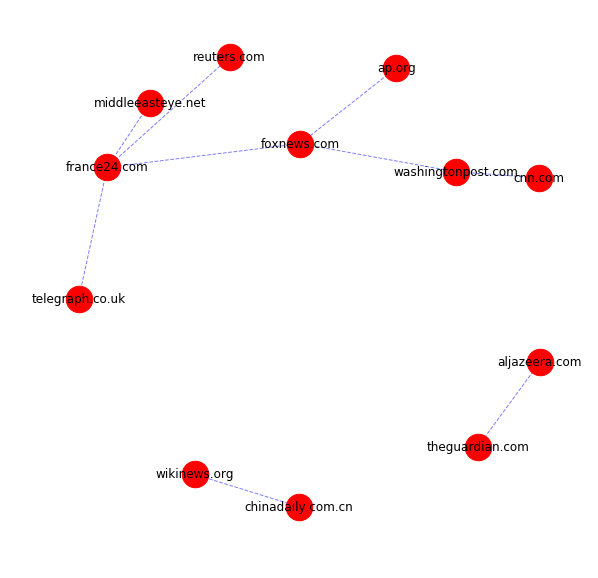

0.17


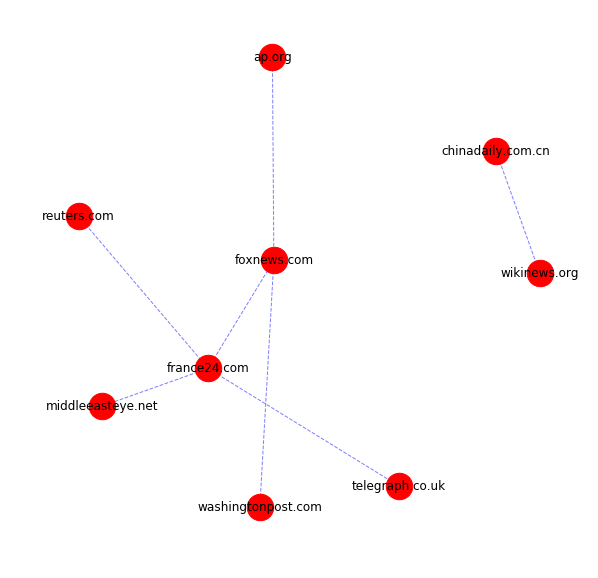

0.175


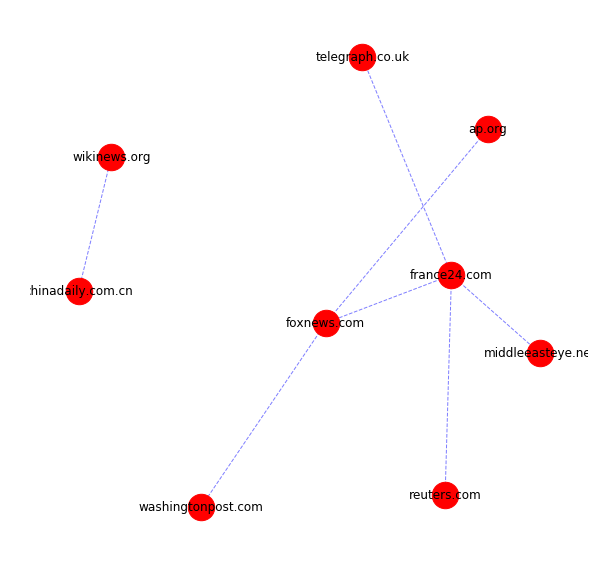

0.18


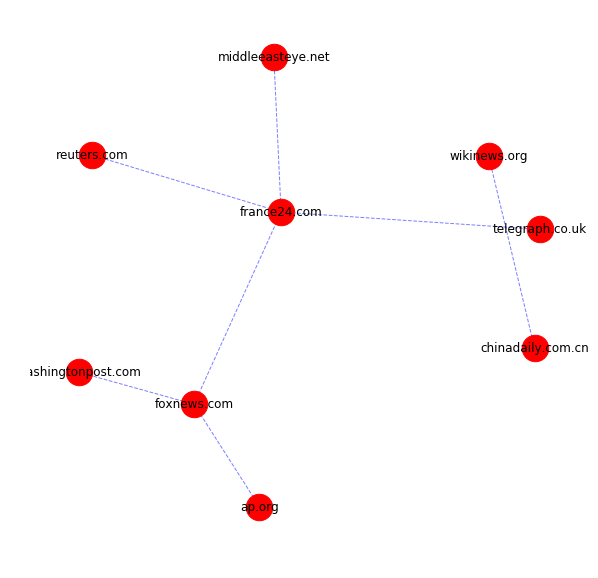

0.185


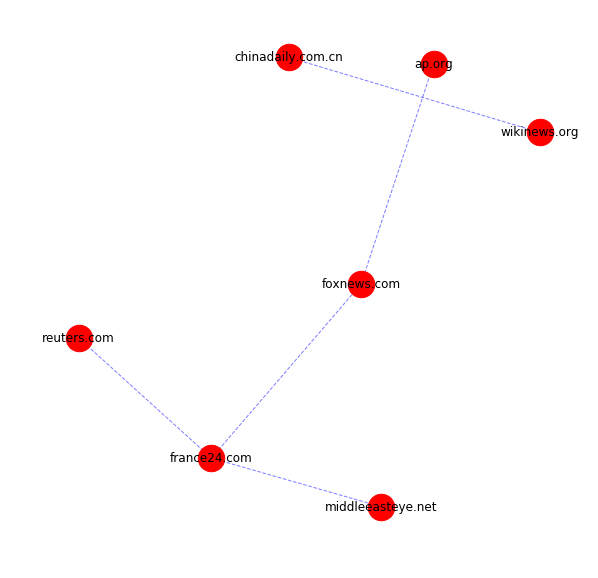

0.19


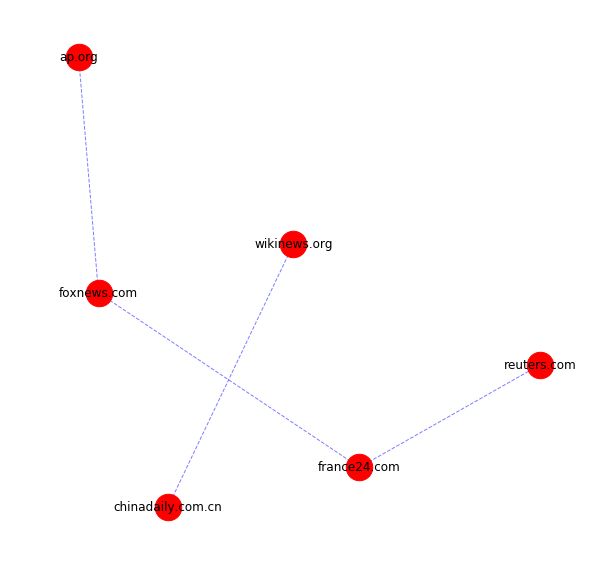

0.195


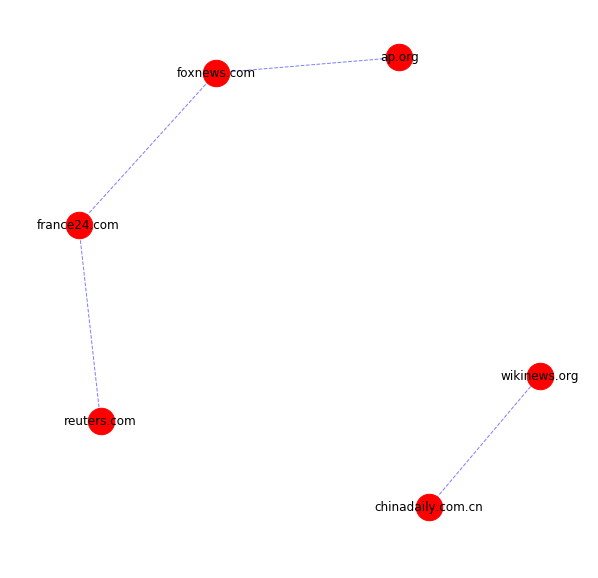

In [17]:
for i in np.arange(0.1,0.2, 0.005):
    l1_lambda = i
    print(l1_lambda)
    graph_lasso = GraphLasso(alpha=l1_lambda)
    graph_lasso.fit(A_std)
    plot_network(graph_lasso.get_precision(), sources)

In [18]:
from GraphicalLasso import GraphicalLasso as GL
from LassoSolver import LassoSolver as Lasso
from sklearn import linear_model
def my_graphical_lasso(data, l1_lambda):
    gl = GL(l1_solver_f=Lasso)
    S = np.cov(data.T)
    return gl.fit(S, l1_lambda)

## Lambda sweeping

0.1


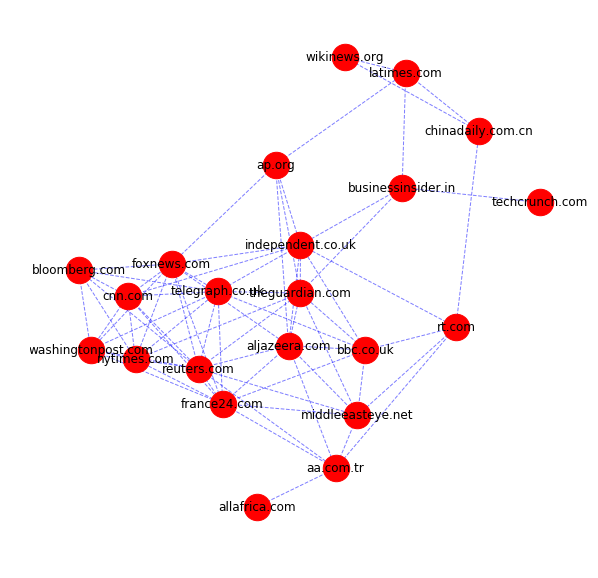

0.105


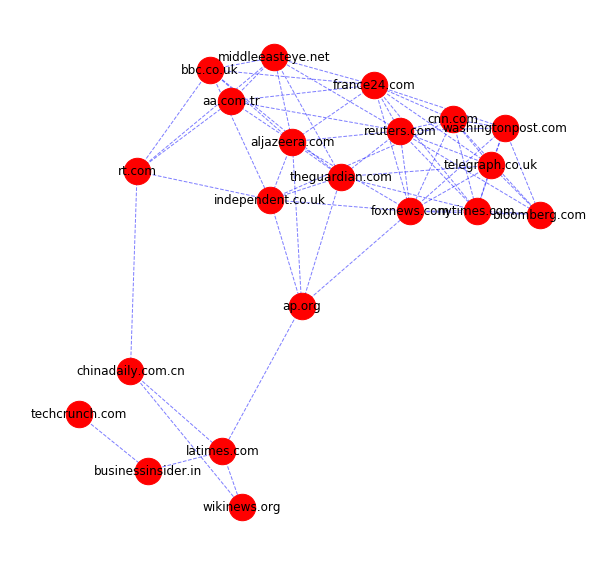

0.11


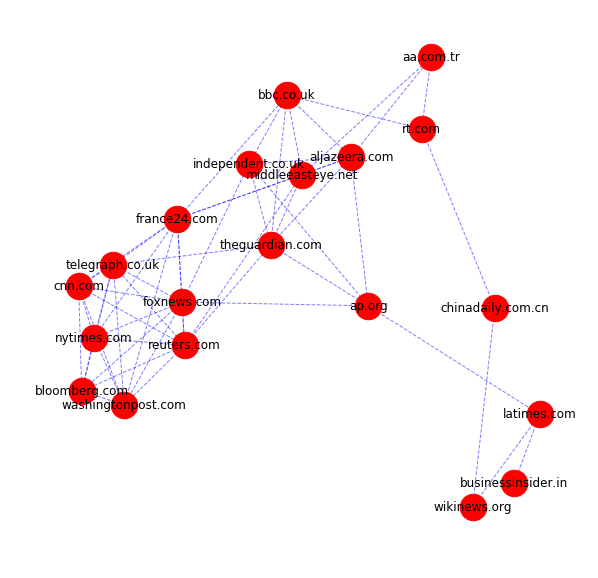

0.115


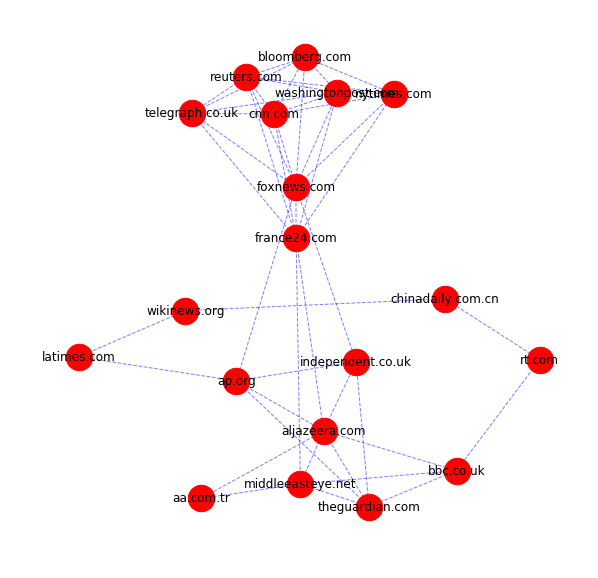

0.12


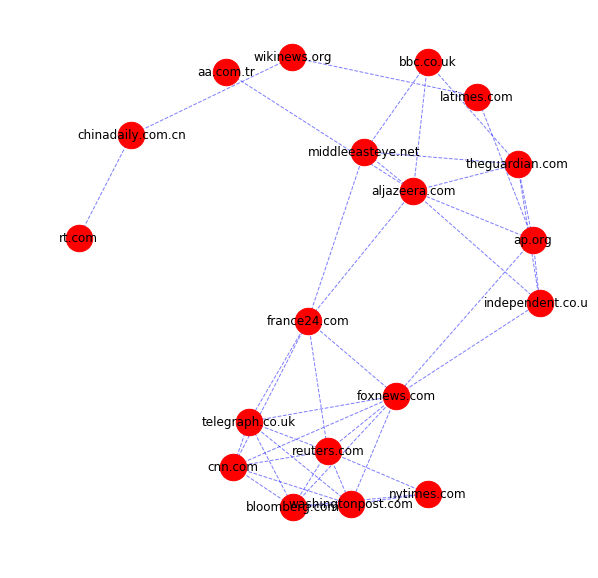

0.125


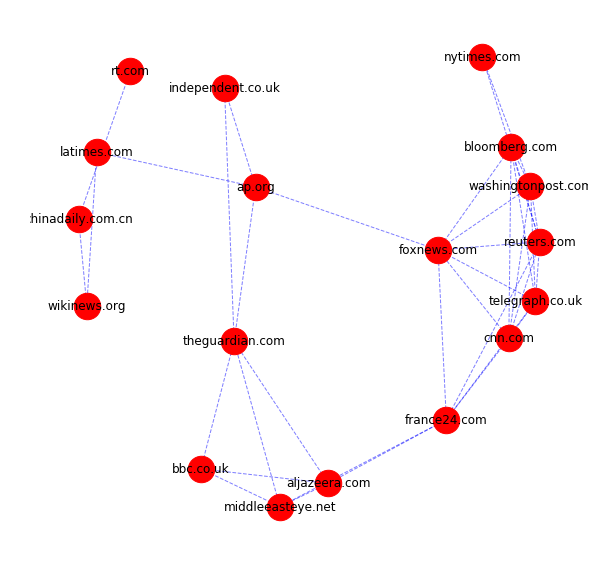

0.13


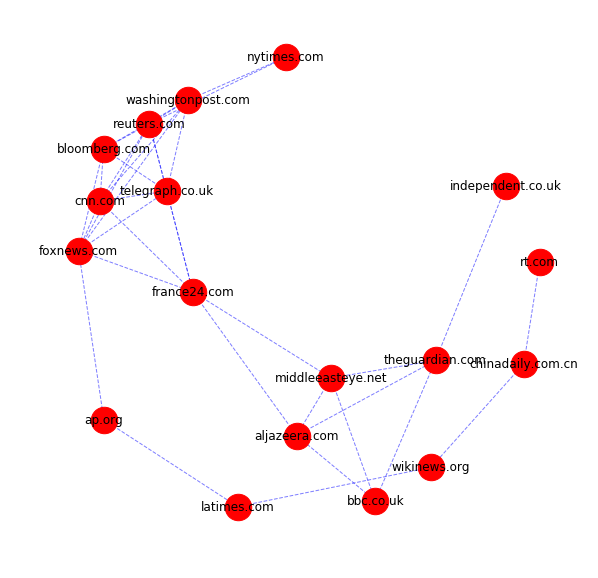

0.135


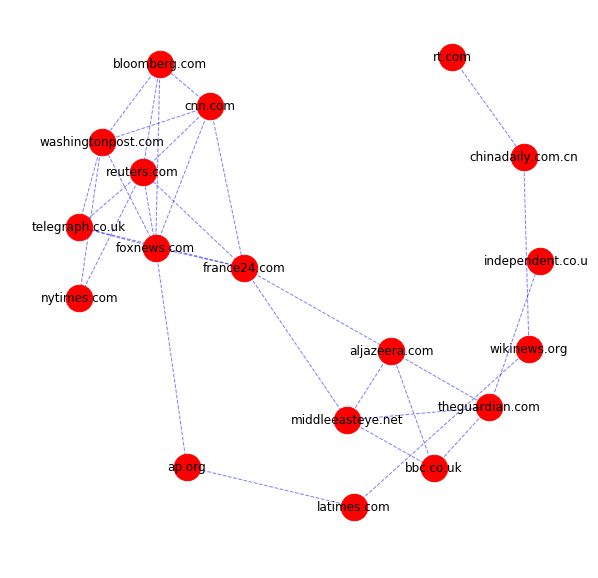

0.14


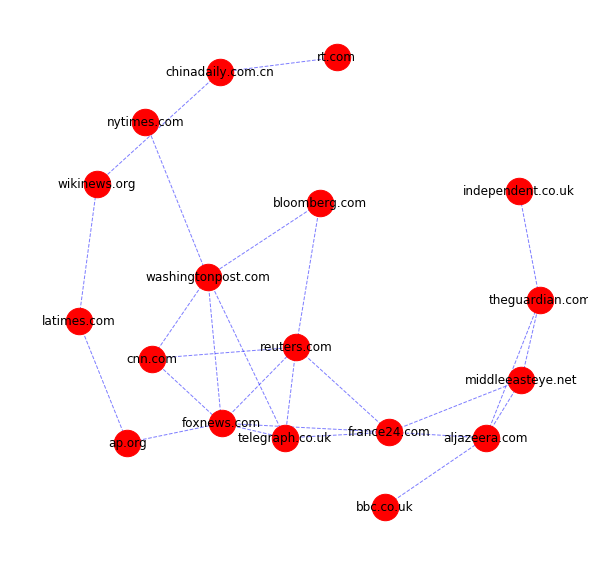

0.145


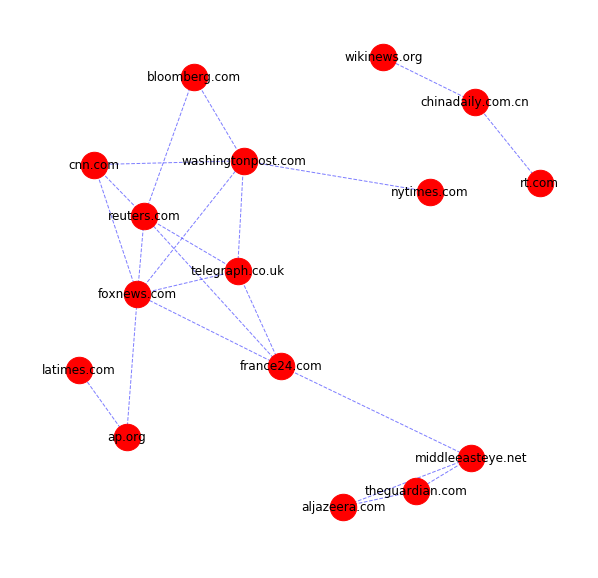

0.15


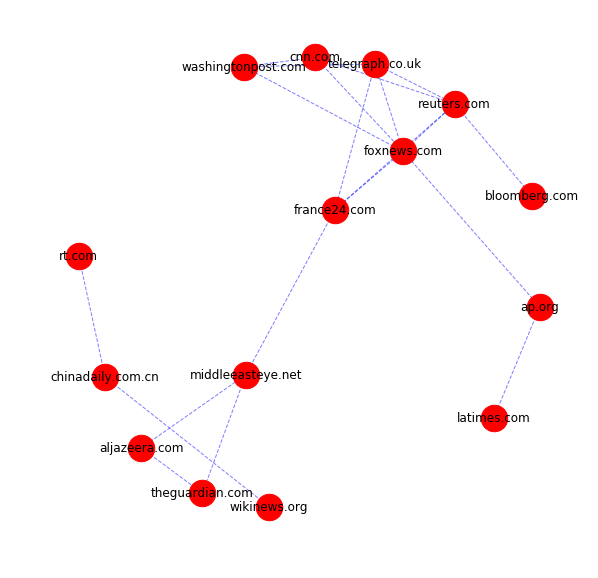

0.155


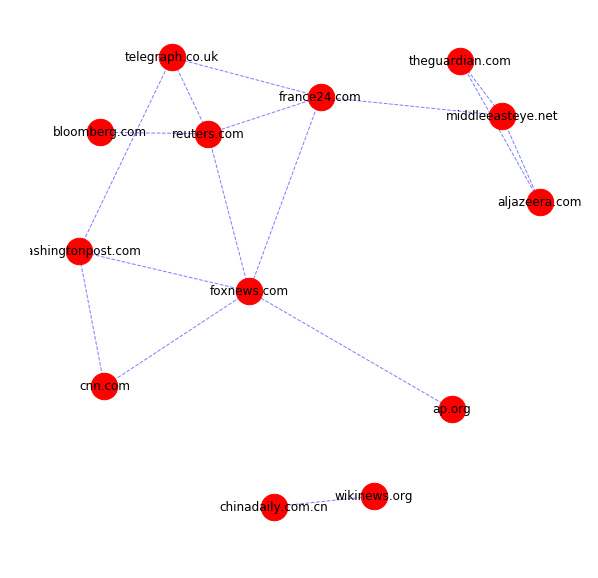

0.16


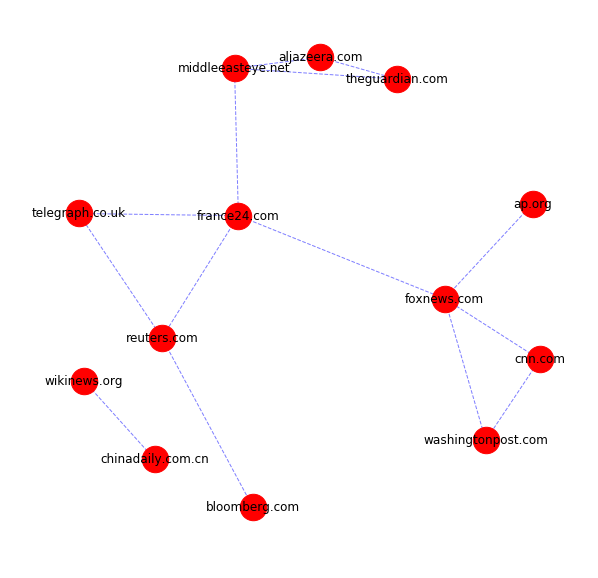

0.165


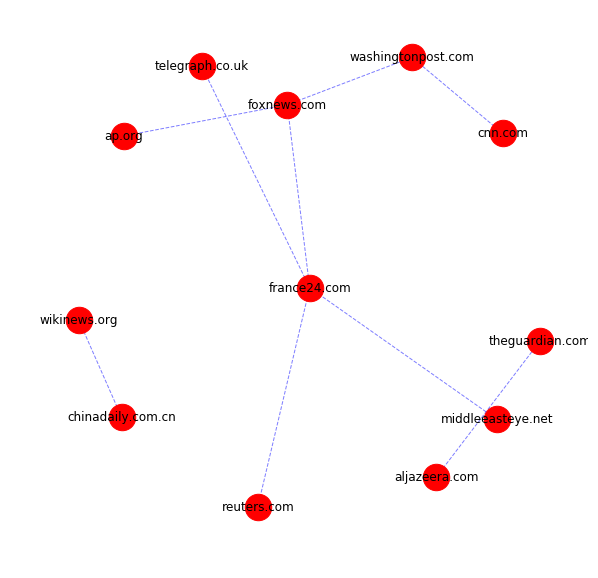

0.17


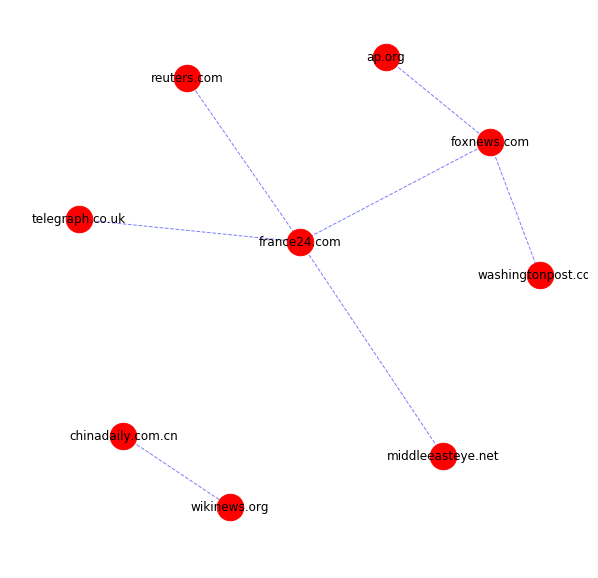

0.175


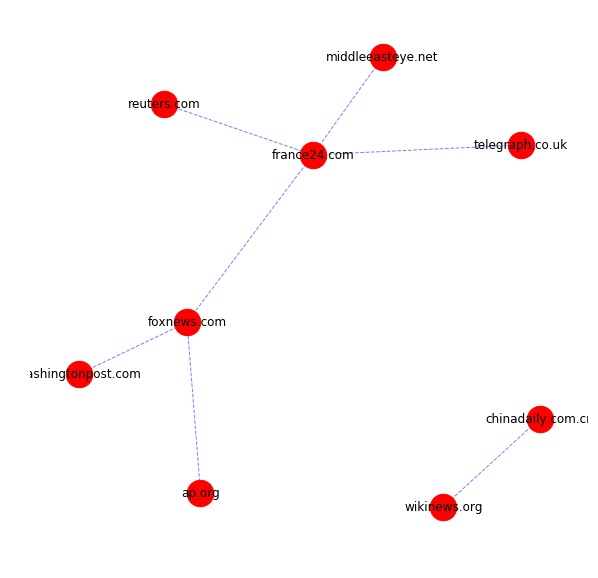

0.18


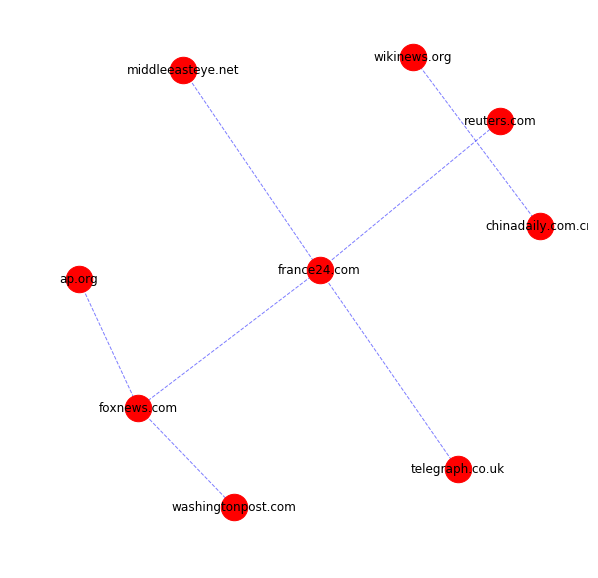

0.185


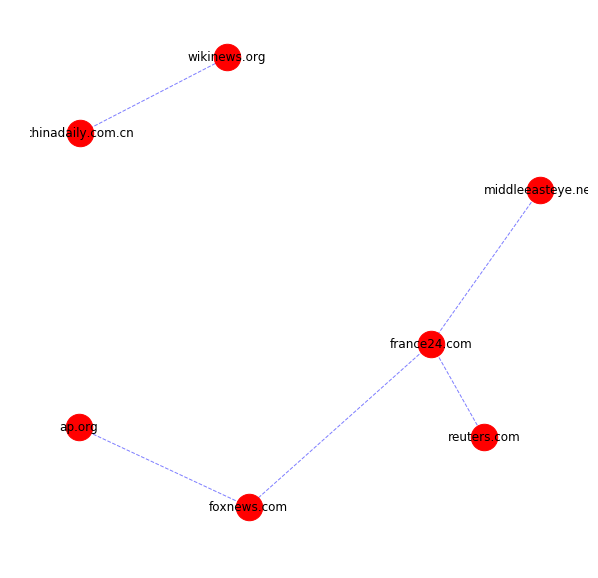

0.19


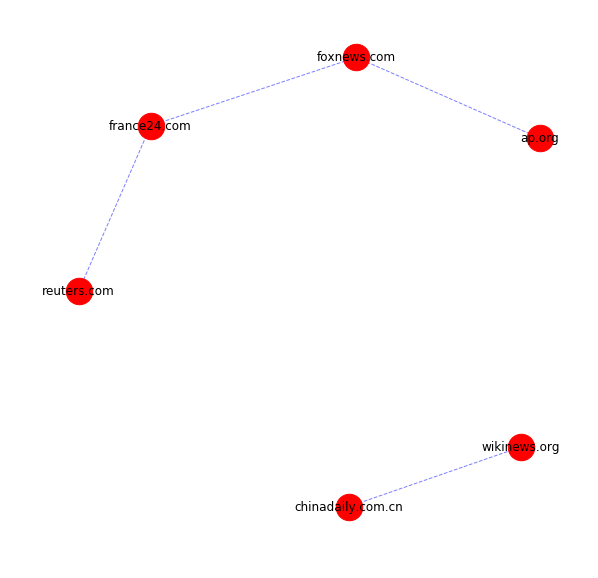

0.195


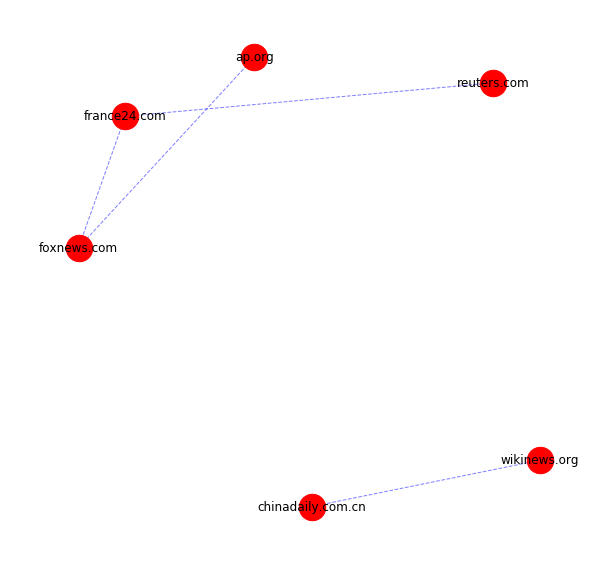

In [19]:
for i in np.arange(0.1,0.2, 0.005):
    l1_lambda = i
    print(l1_lambda)
    plot_network(my_graphical_lasso(A_std, l1_lambda), sources)

## My glasso by inspection

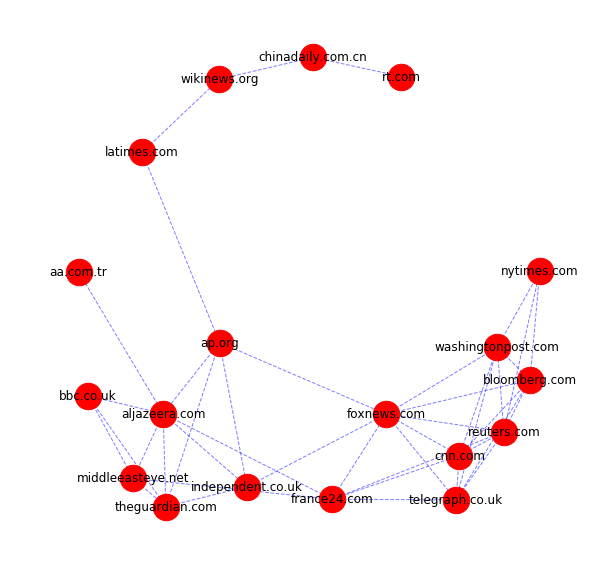

In [20]:
plot_network(my_graphical_lasso(A_std, l1_lambda=0.12), sources)